In [1]:
# Prediction of penetration depth in high power laser welding

import keras
import tensorflow as tf
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import copy

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import Adam
from keras import backend as K
from keras import metrics

from sklearn.model_selection import train_test_split

xy = np.loadtxt('C:/temp/steel_laser.csv', delimiter=',', dtype=np.float32)


In [2]:
# 1: laser power, 2: Welding speed, 3: Beam diameter, 4: Penetration depth
x_data = xy[:, 0:-1]
#x_org = copy.deepcopy(x_data)

# Normalizing data
xmean=x_data.mean(axis=0)
xstd=x_data.std(axis=0)
x_data -= xmean
x_data /= xstd

y_data = xy[:, [-1]]

#원래는 데이터 나눠서 train데이터로 정규화해야함
ymean = y_data.mean(axis=0)
ystd = y_data.std(axis=0)

y_data -= ymean
y_data /= ystd 


In [3]:
# split data: Training data를 70%
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, 
				       train_size=0.70, random_state=42)

# split data: Validation과 Test data를 50:50 으로
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, 
				       train_size=0.50, random_state=42)


In [4]:
model = Sequential()
# Dense(64) is a fully-connected layer with 64 hidden units.
# in the first layer, you must specify the expected input data shape:
# here, 6-dimensional vectors
model.add(Dense(64, activation='relu', input_shape=(3,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

#sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
adam = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-8)
model.compile(loss='mse', optimizer='adam', metrics=['mae'])

history=model.fit(x_train, y_train, epochs=200, batch_size=10, validation_data=(x_val,y_val))


Epoch 1/200
27/27 [==============================] - 2s 40ms/step - loss: 0.9053 - mae: 0.7448 - val_loss: 0.5597 - val_mae: 0.5640
Epoch 2/200
27/27 [==============================] - 0s 2ms/step - loss: 0.2751 - mae: 0.3741 - val_loss: 0.2239 - val_mae: 0.3103
Epoch 3/200
27/27 [==============================] - 0s 2ms/step - loss: 0.1254 - mae: 0.2322 - val_loss: 0.1370 - val_mae: 0.2284
Epoch 4/200
27/27 [==============================] - 0s 2ms/step - loss: 0.0651 - mae: 0.1906 - val_loss: 0.1491 - val_mae: 0.2387
Epoch 5/200
27/27 [==============================] - 0s 2ms/step - loss: 0.0737 - mae: 0.1907 - val_loss: 0.1566 - val_mae: 0.2400
Epoch 6/200
27/27 [==============================] - 0s 2ms/step - loss: 0.0671 - mae: 0.1699 - val_loss: 0.1090 - val_mae: 0.2141
Epoch 7/200
27/27 [==============================] - 0s 3ms/step - loss: 0.0478 - mae: 0.1611 - val_loss: 0.1109 - val_mae: 0.2109
Epoch 8/200
27/27 [==============================] - 0s 3ms/step - loss: 0.0550 - 

Epoch 125/200
27/27 [==============================] - 0s 3ms/step - loss: 0.0197 - mae: 0.0978 - val_loss: 0.0566 - val_mae: 0.1404
Epoch 126/200
27/27 [==============================] - 0s 2ms/step - loss: 0.0125 - mae: 0.0805 - val_loss: 0.0635 - val_mae: 0.1477
Epoch 127/200
27/27 [==============================] - 0s 3ms/step - loss: 0.0096 - mae: 0.0649 - val_loss: 0.0677 - val_mae: 0.1505
Epoch 128/200
27/27 [==============================] - 0s 3ms/step - loss: 0.0121 - mae: 0.0745 - val_loss: 0.0648 - val_mae: 0.1432
Epoch 129/200
27/27 [==============================] - 0s 3ms/step - loss: 0.0100 - mae: 0.0673 - val_loss: 0.0495 - val_mae: 0.1411
Epoch 130/200
27/27 [==============================] - 0s 2ms/step - loss: 0.0159 - mae: 0.0827 - val_loss: 0.0567 - val_mae: 0.1354
Epoch 131/200
27/27 [==============================] - 0s 2ms/step - loss: 0.0127 - mae: 0.0774 - val_loss: 0.0507 - val_mae: 0.1385
Epoch 132/200
27/27 [==============================] - 0s 2ms/step - 

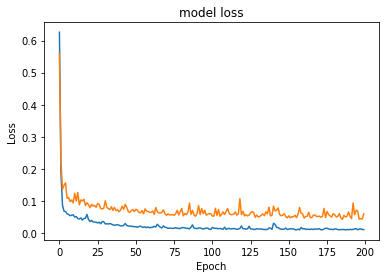

6/6 [==============================] - 0s 997us/step - loss: 0.0440 - mae: 0.1266


In [5]:
# 교재 Fig. 3-9
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

score = model.evaluate(x_test, y_test, batch_size=10)


In [6]:
# 등고선 그리는 학습 코드

# 1: laser power, 2: Welding speed, 3: Beam diameter, 4: Penetration depth
# delta = 0.1 은 x와 y 데이터를 0.1 간격으로 등분하여 행렬 생성
delta  = 0.1
x = np.arange(1.0, 7.0, delta)
y = np.arange(0.1, 0.7, delta)
X, Y = np.meshgrid(x, y)

zz=np.zeros((len(y),len(x)),dtype=float)


In [7]:
for i in range(len(y)):
    for j in range(len(x)):
        graphx = [[4, x[j], y[i]]]
        graphx -= xmean
        graphx /= xstd
        result=model.predict(graphx)*ystd+ymean
        zz[i,j]=result

Text(0.5, 1.0, ' Contour plot for penetration depth for 4 kW laser power ')

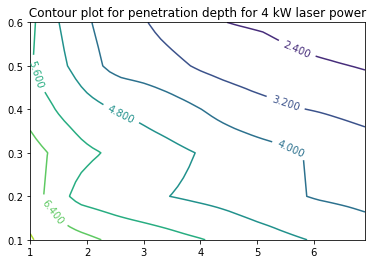

In [8]:
fig, ax = plt.subplots()
CS = ax.contour(X, Y, zz)
ax.clabel(CS, inline=1, fontsize=10)
ax.set_title(' Contour plot for penetration depth for 4 kW laser power ')